# Real World Example - Netflix

## Preliminary research

### The dataset obtained from Kaggle consists of all the movies and TV shows available on Netflix from 2008 to 2021

In [2]:
import pandas as pd
Netflix = pd.read_csv("netflix_titles_2021.csv")
Netflix.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
Netflix.shape

(8807, 12)

In [4]:
Netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
Netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
Netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
Netflix["director"].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [9]:
Netflix["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [10]:
Netflix["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

### Base on the initial overview of the data, this dataset contains 8807 rows and 12 columns. All attributes are string except for release year, columns that contain missing values are director, cast, country, date added, rating, and duration. 

# Data cleaning and preprocessing

## Handling missing data

In [11]:
incorrect_index = Netflix.loc[Netflix["duration"].isnull(),].index
Netflix.loc[Netflix["duration"].isnull(),]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


### incorrect data input in these rows as duration were placed under the rating column

In [12]:
Netflix.loc[Netflix["duration"].isnull(),"duration"]=Netflix["rating"]
Netflix.iloc[incorrect_index,]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [13]:
import numpy as np
Netflix.loc[incorrect_index,"rating"] = np.nan
Netflix.iloc[incorrect_index,]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


### Change all missing values with the word 'unknown'

In [14]:
Netflix['director'].fillna('Unknown', inplace=True)
Netflix['cast'].fillna('Unknown', inplace=True)
Netflix['country'].fillna('Unknown', inplace=True)
Netflix['rating'].fillna('Unknown', inplace=True)

## Handling data type of dates column

In [15]:
Netflix["date_added"]=pd.to_datetime(Netflix['date_added'],format="mixed")

In [16]:
Netflix.loc[Netflix["date_added"].isnull(),]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


### For missing dates, assume they are added to Netflix on the last day of year 2021 where it haven't update the times yet when data are collected

In [17]:
no_date_index=Netflix.loc[Netflix["date_added"].isnull(),].index

In [18]:
Netflix.loc[no_date_index,"date_added"]=pd.to_datetime("2021-12-31",format='%Y-%m-%d')

In [19]:
Netflix.iloc[no_date_index,]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-12-31,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,2021-12-31,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2021-12-31,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,2021-12-31,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,2021-12-31,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,2021-12-31,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,2021-12-31,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2021-12-31,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2021-12-31,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,2021-12-31,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


### Split the date added column into two new columns, year added and month added

In [20]:

Netflix["year_added"] = Netflix["date_added"].apply(lambda x:x.year).astype('int')
Netflix["month_added"] = Netflix["date_added"].apply(lambda x:x.month).astype('str')
Netflix['month_added'] = Netflix['month_added'].replace({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'June', '7':'July', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})
Netflix.drop(columns = ['date_added'],inplace = True)
Netflix.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Sep
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Sep
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Sep


### Create genre categories and main casts

In [21]:
casts = Netflix['cast'].apply(lambda x:x.split(",") if not x == "Unknown" else np.nan)
Netflix['cast1'] = casts.str.get(0)
Netflix['cast2'] = casts.str.get(1)
Netflix['cast3'] = casts.str.get(2)
Netflix.drop(columns = ['cast'],inplace =True)
Netflix.head(3)

,show_id,type,title,director,country,release_year,rating,duration,listed_in,description,year_added,month_added,cast1,cast2,cast3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,Sep,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,Sep,Ama Qamata,Khosi Ngema,Gail Mabalane
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,Sep,Sami Bouajila,Tracy Gotoas,Samuel Jouy


In [22]:
genres = Netflix['listed_in'].apply(lambda x:x.split(","))
Netflix['genre1'] = genres.str.get(0)
Netflix['genre2'] = genres.str.get(1)
Netflix['genre3'] = genres.str.get(2)
Netflix.drop(columns = ['listed_in'],inplace =True)
Netflix.head(3)

,show_id,type,title,director,country,release_year,rating,duration,description,year_added,month_added,cast1,cast2,cast3,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,Sep,NaN,NaN,NaN,Documentaries,NaN,NaN
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,Sep,Ama Qamata,Khosi Ngema,Gail Mabalane,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,Unknown,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,Sep,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Crime TV Shows,International TV Shows,TV Action & Adventure


## Exploratory Data Analysis

### Compare number of movies and TV shows added in a pie chart

Text(0.5, 1.0, 'All available show on Netflix')

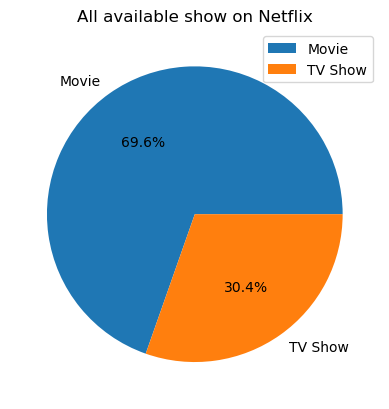

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

type_show = ['Movie','TV Show']
Value_count = [len(Netflix[Netflix["type"]=="Movie"]),len(Netflix[Netflix["type"]=="TV Show"])]
plt.pie(Value_count,labels=type_show,autopct="%2.1f%%")
plt.legend(loc="upper right")
plt.title("All available show on Netflix")

Text(0.5, 1.0, 'Proportion of films released each month')

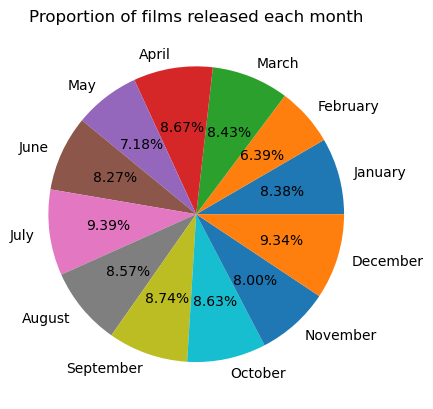

In [24]:

type_show = ['January','February', 'March','April','May','June','July','August','September','October','November','December']
Value_count = [len(Netflix[Netflix["month_added"]=="Jan"]),len(Netflix[Netflix["month_added"]=="Feb"]),
              len(Netflix[Netflix["month_added"]=="Mar"]),len(Netflix[Netflix["month_added"]=="Apr"]),
              len(Netflix[Netflix["month_added"]=="May"]),len(Netflix[Netflix["month_added"]=="June"]),
              len(Netflix[Netflix["month_added"]=="July"]),len(Netflix[Netflix["month_added"]=="Aug"]),
              len(Netflix[Netflix["month_added"]=="Sep"]),len(Netflix[Netflix["month_added"]=="Oct"]),
              len(Netflix[Netflix["month_added"]=="Nov"]),len(Netflix[Netflix["month_added"]=="Dec"])]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")

plt.title("Proportion of films released each month")

### Bar chart for distribution of rating, genre, and actor

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, 'Unknown'),
  Text(12, 0, 'NR'),
  Text(13, 0, 'TV-Y7-FV'),
  Text(14, 0, 'UR')])

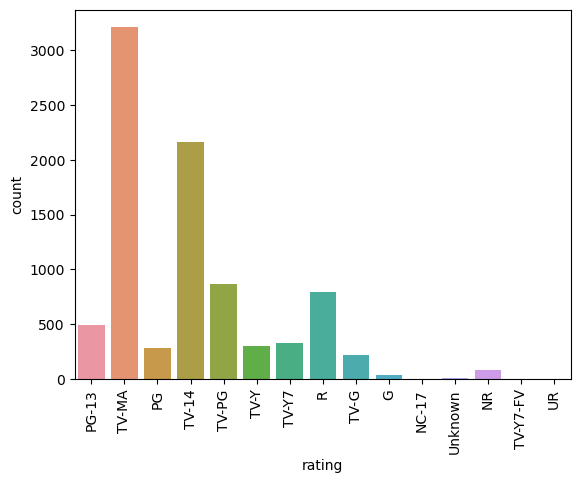

In [25]:
sns.countplot(x=Netflix['rating'],orient='v')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'International TV Shows'),
  Text(2, 0, 'Crime TV Shows'),
  Text(3, 0, 'Docuseries'),
  Text(4, 0, 'TV Dramas'),
  Text(5, 0, 'Children & Family Movies'),
  Text(6, 0, 'Dramas'),
  Text(7, 0, 'British TV Shows'),
  Text(8, 0, 'Comedies'),
  Text(9, 0, 'TV Comedies'),
  Text(10, 0, 'Thrillers'),
  Text(11, 0, 'Horror Movies'),
  Text(12, 0, "Kids' TV"),
  Text(13, 0, 'Action & Adventure'),
  Text(14, 0, 'Reality TV'),
  Text(15, 0, 'Anime Series'),
  Text(16, 0, 'International Movies'),
  Text(17, 0, 'Sci-Fi & Fantasy'),
  Text(18, 0, 'Classic Movies'),
  Text(19, 0, 'TV Shows'),
  Text(20, 0, 'Stand-Up Comedy'),
  Text(21, 0, 'TV Action & Adventure'),
  Text(22, 0, 'Movies'),
  Text(23, 0, 'Stand-Up Comedy & Talk Shows'),
  Text(24, 0, 'Classic & Cult TV'),
  Text(25, 0, 'An

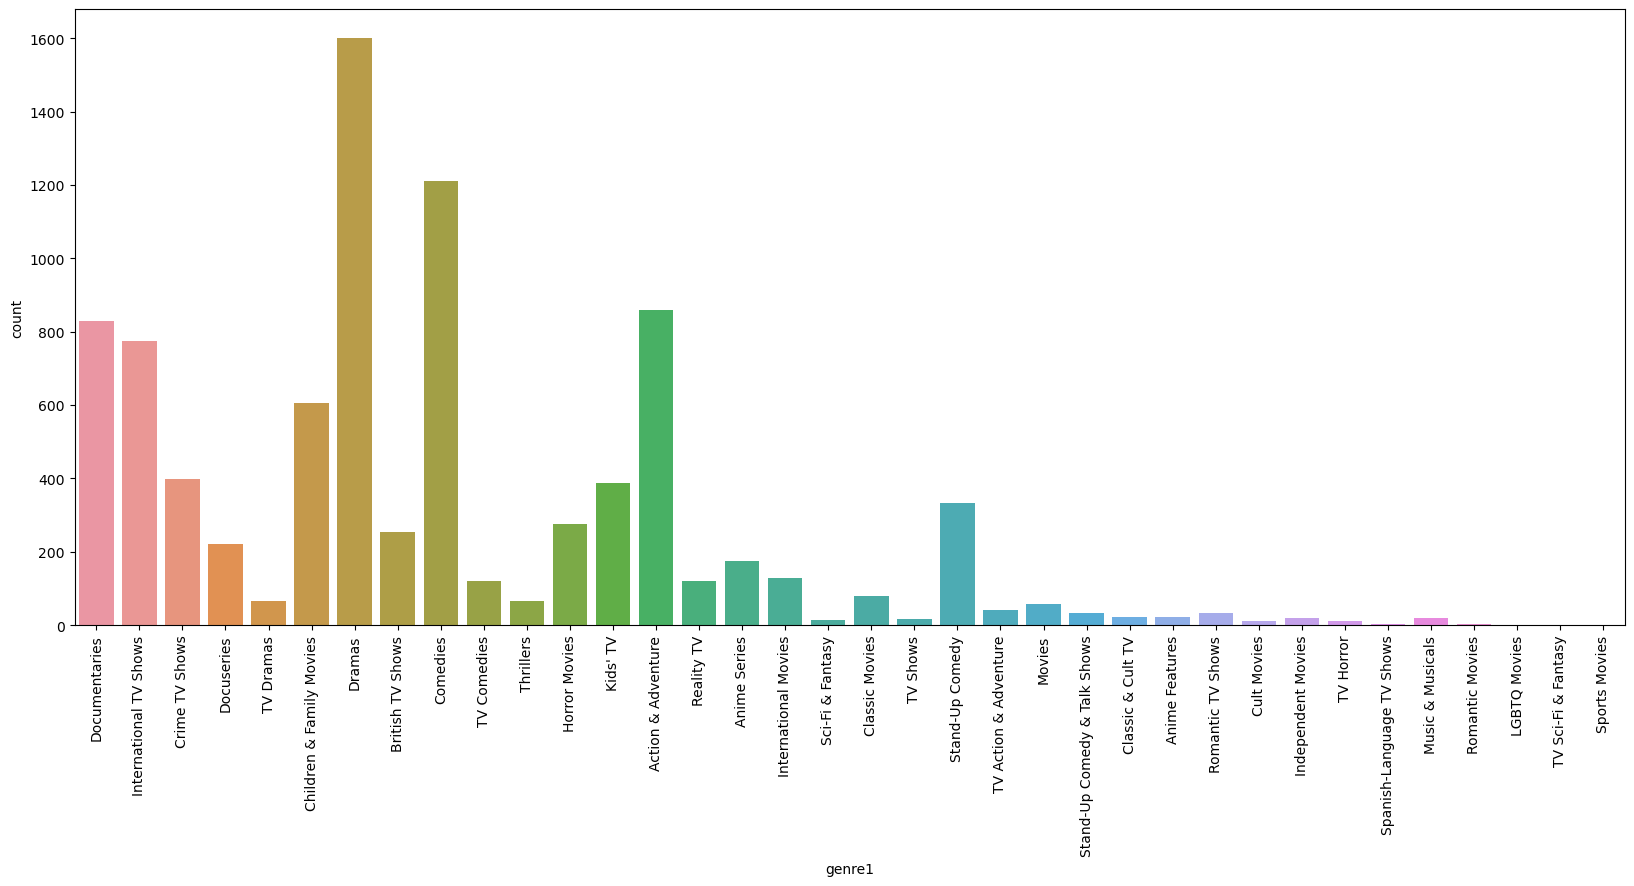

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x=Netflix['genre1'],orient='v')
plt.xticks(rotation=90)

In [27]:
main_actors = Netflix["cast1"].value_counts()[:21]
main_actors

cast1
Shah Rukh Khan        26
Akshay Kumar          23
Amitabh Bachchan      20
David Attenborough    20
Adam Sandler          20
Vatsal Dubey          18
Ajay Devgn            16
Nicolas Cage          16
Michela Luci          14
Aamir Khan            14
Anil Kapoor           13
Ahmed Helmy           13
David Spade           13
Salman Khan           12
Naseeruddin Shah      12
Sanjay Dutt           11
Shahid Kapoor         11
Junko Takeuchi        10
Harrison Ford         10
Eddie Murphy          10
Jack Black            10
Name: count, dtype: int64

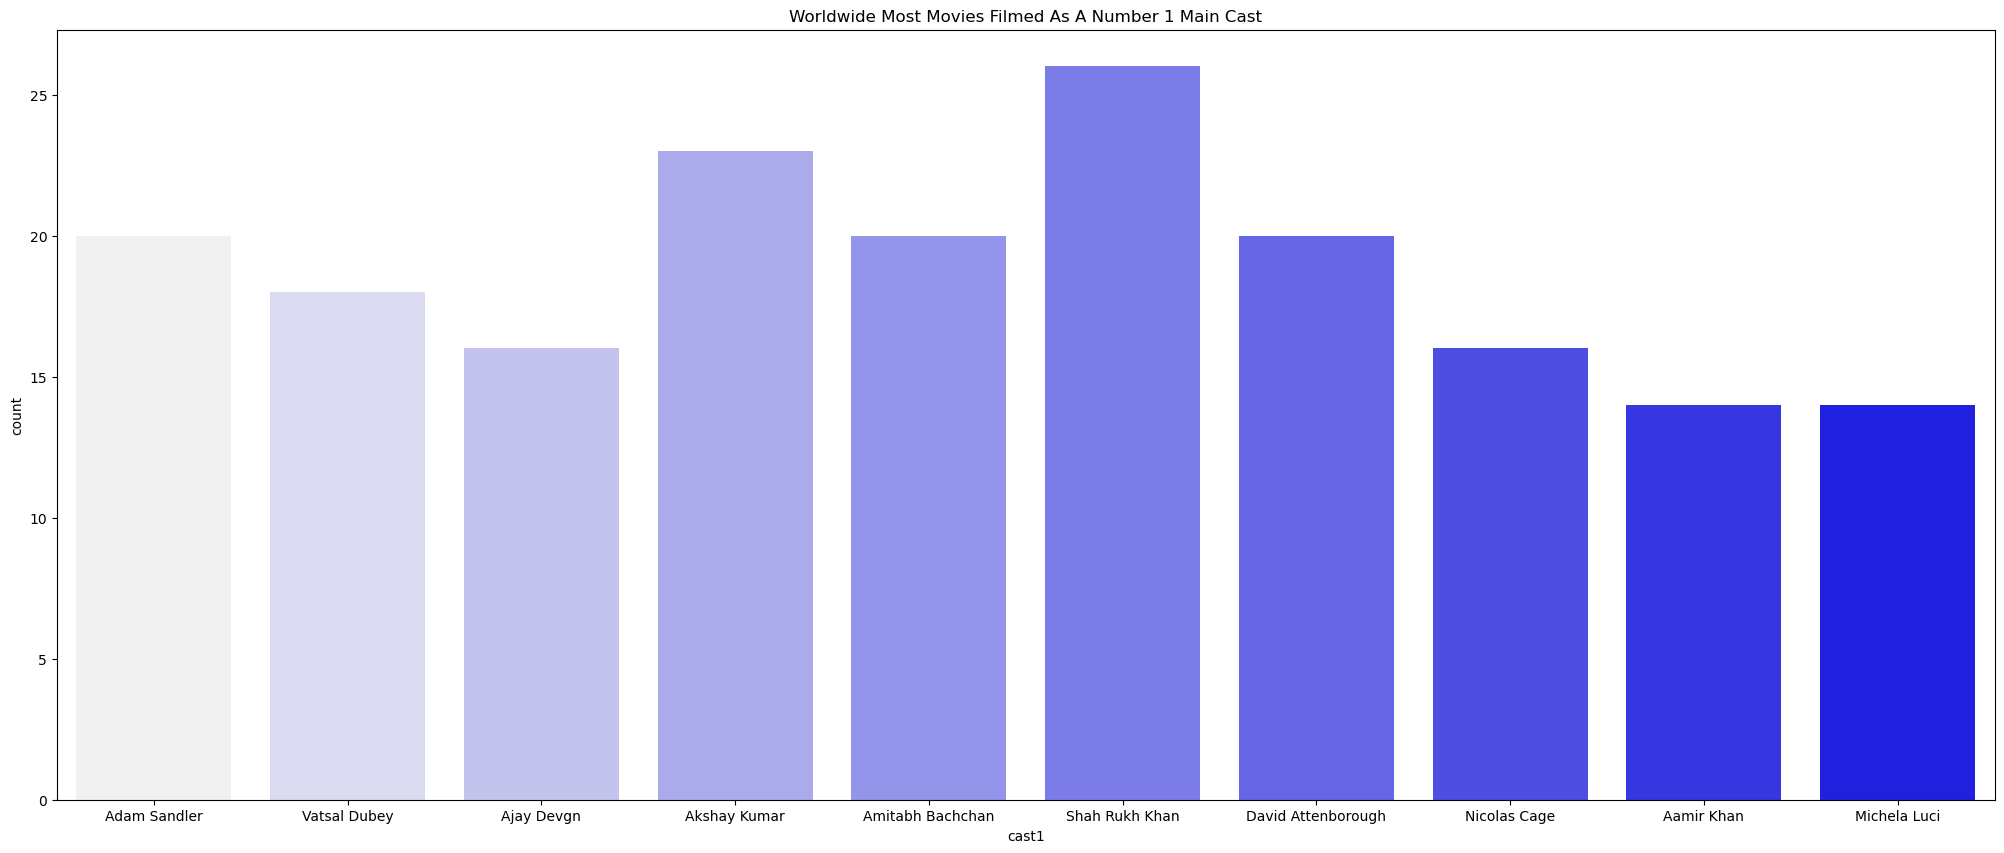

In [28]:
d= Netflix[(Netflix['cast1']=='Shah Rukh Khan') | (Netflix['cast1']=='Akshay Kumar') | (Netflix['cast1']=='Amitabh Bachchan')
          | (Netflix['cast1']=='David Attenborough') | (Netflix['cast1']=='Adam Sandler') | (Netflix['cast1']=='Vatsal Dubey')
          | (Netflix['cast1']=='Ajay Devgn') | (Netflix['cast1']=='Nicolas Cage') | (Netflix['cast1']=='Michela Luci')
          | (Netflix['cast1']=='Aamir Khan')] 
plt.figure(figsize=(25,10))
sns.countplot(x = 'cast1',data = d,palette = 'light:b')
plt.title("Worldwide Most Movies Filmed As A Number 1 Main Cast")
plt.show()

### Line chart for films added to Netflix during year 2008-2021, movies vs. TV shows

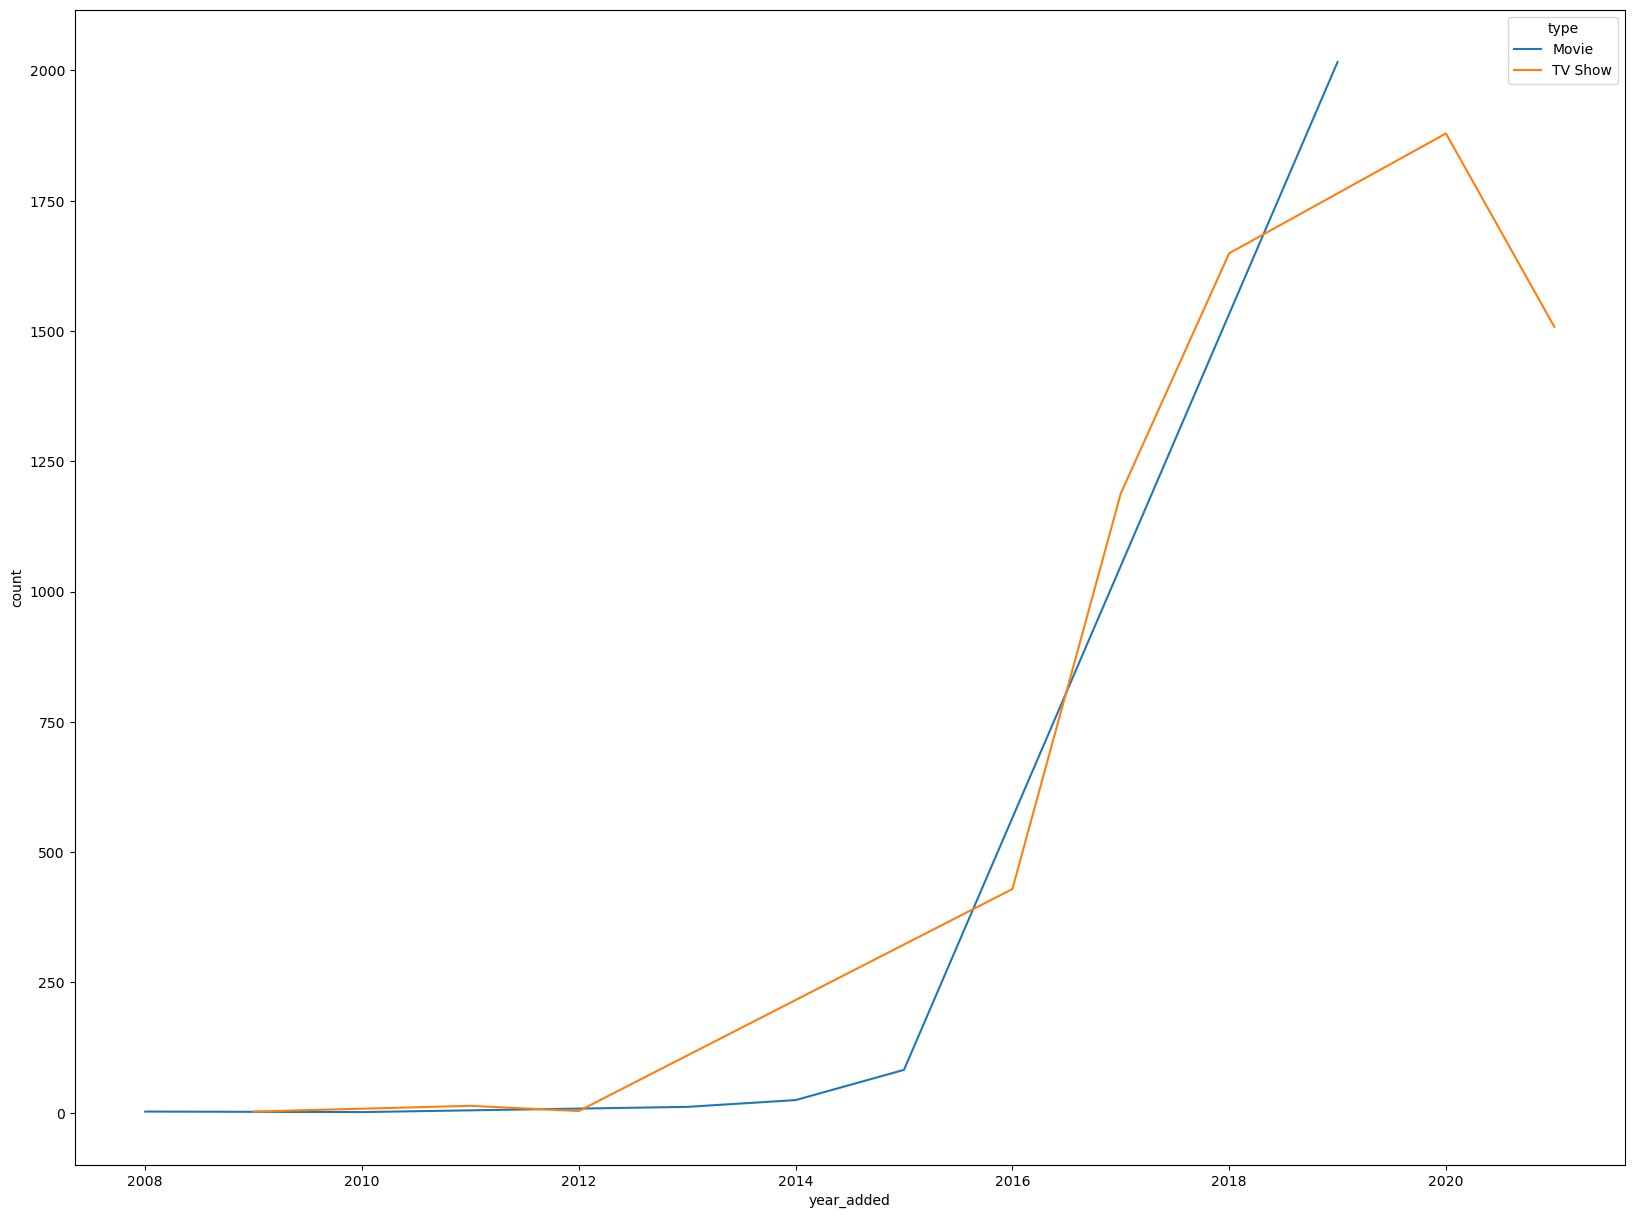

In [29]:
type_film = Netflix['year_added'].value_counts().reset_index()
plt.figure(figsize=(20,15))
sns.lineplot(x=type_film['year_added'],y=type_film['count'],hue='type',data=Netflix)
plt.show()

## Comparison between top 10 countries

In [30]:
countries = Netflix["country"].value_counts()[:21]
countries

country
United States                    2818
India                             972
Unknown                           831
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: count, dtype: int64

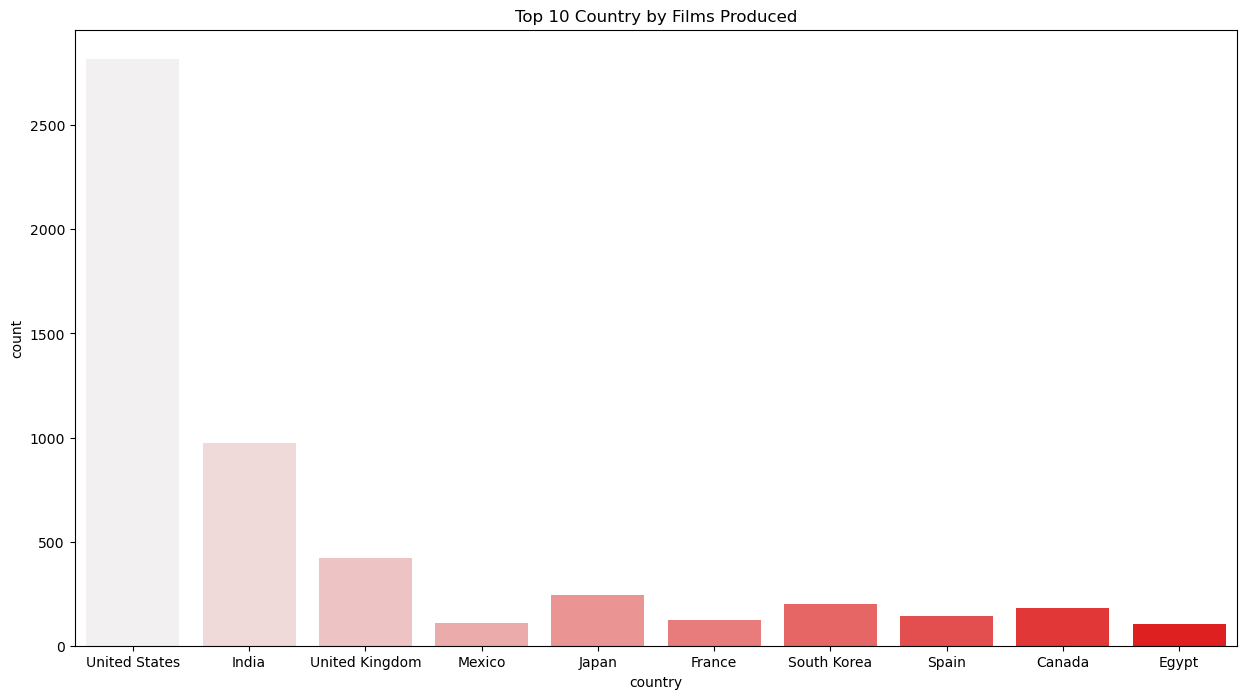

In [31]:
d= Netflix[(Netflix['country']=='United States') | (Netflix['country']=='India') | (Netflix['country']=='United Kingdom')
          | (Netflix['country']=='Japan') | (Netflix['country']=='South Korea') | (Netflix['country']=='Canada')
          | (Netflix['country']=='Spain') | (Netflix['country']=='France') | (Netflix['country']=='Mexico')
          | (Netflix['country']=='Egypt')] 
plt.figure(figsize=(15,8))
sns.countplot(x = 'country',data = d,palette = 'light:r')
plt.title("Top 10 Country by Films Produced")
plt.show()

### Boxplot for duration of films by countries

C:\Users\richa\AppData\Local\Temp\ipykernel_23992\1792145893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_df['duration']= Movie_df['duration'].apply(lambda x:x.split()[0]).astype('int')


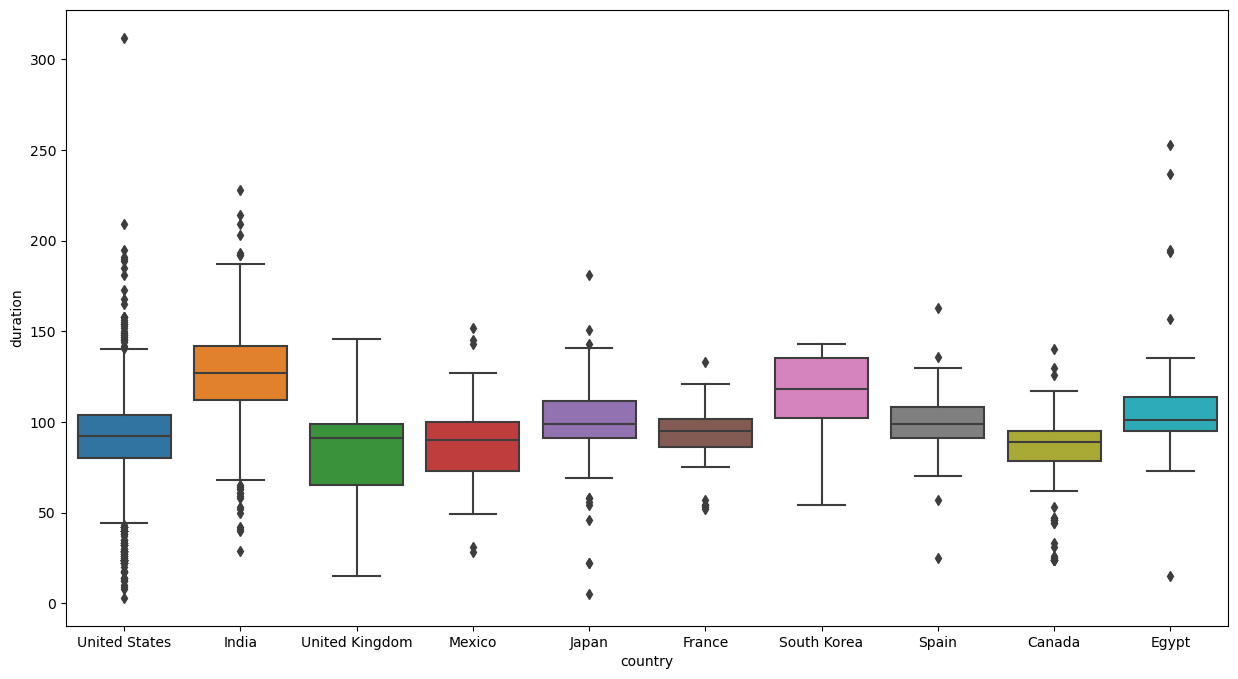

In [36]:
Movie_df = Netflix.loc[Netflix['type']=='Movie',:]
Movie_df['duration']= Movie_df['duration'].apply(lambda x:x.split()[0]).astype('int')
plt.figure(figsize=(15,8))
sns.boxplot(x=d['country'],y='duration',data=Movie_df)
plt.show()

# Statistical Inferences

## 1) Suppose a small-sized filmmaker is projected to produce a movie and make its launch on Netflix, he wants to know if the average duration for entire movie industry exceeds 100 minutes, so that he can allocate resources for plot planning, filming, casting, and directing, while keeping the cost of production down. A consultant of the filmmaker refers to the data collected from Netflix as a representative sample of the industry.

## Null: Average duration of films equal 100 mins
## Alternative: Average duration of films greater than 100 mins

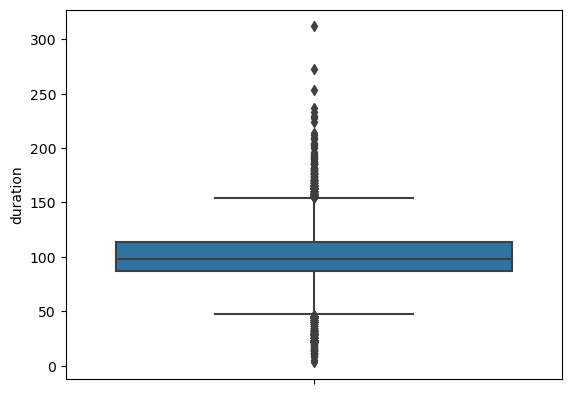

In [37]:
data = Movie_df
data
#plt.figure(figsize=(15,8))
sns.boxplot(y=data['duration'],data=data)
plt.show()

In [38]:
#Remove outliers
Q1_duration = data.duration.quantile(0.25)
Q3_duration = data.duration.quantile(0.75)
IQR = Q3_duration - Q1_duration
duration_upper = Q3_duration + 1.5*IQR
duration_lower = Q1_duration - 1.5*IQR

upper_index = data.loc[data['duration']>duration_upper,].index
lower_index = data.loc[data['duration']<duration_lower,].index

## remove upper bound outliers
data = data.drop(upper_index)

## remove upper bound outliers
data = data.drop(lower_index)

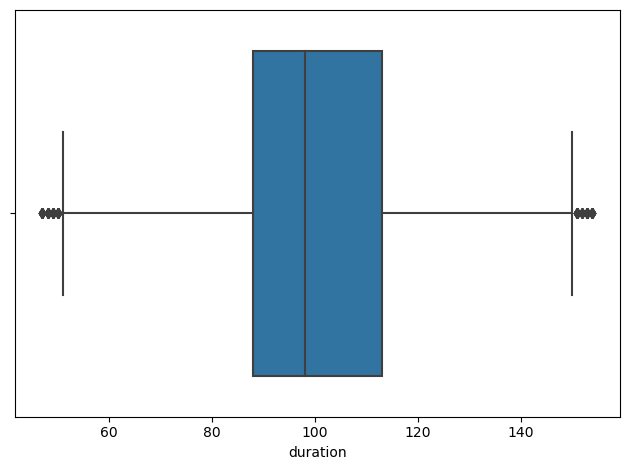

In [40]:
sns.boxplot(x = 'duration', data = data)
plt.tight_layout()
#plt.savefig("hist of ArrivalDateWeekNumber.png" )
plt.show()

In [45]:
import scipy.stats as stats
stats.ttest_1samp(a= data['duration'], popmean=100, alternative="greater")

TtestResult(statistic=-0.1817443505887004, pvalue=0.5721050779926418, df=5680)

### Fail to reject the null hypothesis

## 2) About 69.6% of the films in Netflix are movies, a researcher wants to know if films produced by different countries follows the same pattern as described, in order to validate the statement which the trend of making movies is evident in all countries. He has selected the 10 countries that Netflix has the most films from as the sample

## Null: Proportion of movies by country is equal to the overall proportion of movies on Netflix

## Alternative: Proportion of movies by country is not equal to the overall proportion of movies on Netflix

In [46]:
cnts = pd.crosstab(d['type'],d['country'],margins=True)
cnts

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,All
type,,,,,,,,,,,
Movie,122,92,75,893,76,70,41,97,206,2058,3730
TV Show,59,14,49,79,169,40,158,48,213,760,1589
All,181,106,124,972,245,110,199,145,419,2818,5319


In [53]:
exp = np.array([181, 106, 124, 972,245,110,199,145,419,2818]) * 0.696
obs = np.array([122,92,75,893,76,70,41,97,206,2058])

# Scale expected so that the sum matches observed
exp = exp * (obs.sum() / exp.sum())

stats.chisquare(f_obs=obs,f_exp=exp)

Power_divergenceResult(statistic=225.1256072079237, pvalue=1.7475364880211926e-43)

### Reject the null hypothesis

# Full Report

## The dataset used for this project involves all of the films released on Netflix, an online stream platform where individuals and family can watch any movies and shows at home at a cost of subscription fees, which is much cheaper compared to purchasing CDs or going to the theater. The attributes included show ID, type of flim, director name, casts involved, country(ies) of origin, genre listed in, date added, year it releases, film rating, and description of the film.

## First, the dataset is downloaded from Kaggle and read the file using pandas, then check the structure of the data (8807 rows and 12 columns), data types of the columns and their column names, check for null values, show unique values for type column, and finally show the counts for directors, ratings, and country.

## The dataset is also need to be cleaned, there are 3 null values under duration, realizing that the values that are supposed to indicate length of movie are misplaced under the rating column, so corrections are made to switch between the two columns and now no missing value is detected. There are missing values in country, cast, rating, and country that can be labelled as unknown, but for the missing values in date added they can be replaced with the last day of the fiscal year end, as sometime it may takes Netflix few days to get notified after the movies get released on the platform, the date column is transform into datetime type and extracts year and month for the new columns.

## Multiple items listings occur in the cast, listed in, and country, the file does preprocessing for the first two (the report consider cooperation between multiple countries as unique combination) by splitting items by commas, then take the first 3 items into the three new columns for both casts and genres as the main information.

## EDA finding: based on the information given, about 70% of the films available in Netflix are movies, vs 30% of films identified as TV shows. Then observe the newly added films on the monthly basis, each month is approximately equally distribution, with July (9.39%) and December (9.34%) being the two most added months, February (6.39%) being the least added month. The most popular shows in Netflix are dramas, comedies, action & adventure, documentary, and international TV shows, most of the films are rated TV-MA and TV -14 according to the bar charts provided. The most popular actor is Shah Rukh Khan, with 26 films where he is starred as number 1. From the line chart, there is a sudden increase of movies around the year of 2015 and same thing happens in 2012 in TV shows, which coincides with the era of digitalization. The United States contributed the most films in Neflix with 2818 films, followed by India, the UK, Japan, South Korea, Canada, Spain, France, Mexico, and Egypt. from the boxplots, the median of film length are relatively the same for all countries described above, except for India and South Korea who has the higher median.

## Statistical test: two scenarios were tested. The first one is an example of one-sample t-test, the p-value of the test is greater than 5% (0.57), so the null hypothesis is accepted and concluded there is 95% confidence that industrial average of length of the movie is 100 minutes. The second one is a chi-square test, the p-value of the test is almost to 0 (1.74*10^-43), so the null hypothesis is rejected and each country doesn't share the proportion of movies available in Netflix, some country might preffered putting more TV shows than movies on Netflix.

## Conclusion: with all the analyses made, the diversification of film industry, lead by Netflix, has gained massive successes, whether in providing niche segmentations, global collaboration of filmmaking, and mitigating the piracy. Not only that, Netflix is continuing to expand its markets across the world and benefits all parties with its convenience of access.

# Reflection

## The major challenges are dealing with cells with multiple entry and conducting statistical testing, where I need to decide which information best describes a particular film and what tests are suitable for the context of the data. My approaches is to choose the first three items for cast, which are usually the three main actors/actresses the plot of the film is focused on. For genre I did the same thing as the first three labels best categorized a particular film in the segmentation alone. For hypothesis test I focused on numeric attributes that provides quantitative measures, such as duration and counts, which can be used for t-test and chi-square test

## If more advanced features are available, I would like to know what movies and shows are recommended to the user, based on user activity and preference; what is the major factors for rating the film, on the scale from 1 to 5; and detecting relationship between each variables 